<br><center style= "font-family:Tahoma;font-size:2.9em;color:#8B5A2B;font-style:bold"> Análisis del clima de Barcelona</center>


![](images/Barcelona.png)

### Descarga de programas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Descargando el archivo:

In [2]:
data = pd.read_csv('datasets/barcelona-weather/Barcelona-Weather.csv',parse_dates=['DATE'],low_memory= False)

In [3]:
#Viendo las primeras 10 filas del dataframe data:
data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,SPE00119891,"BARCELONA, SP",41.4192,2.1253,412.0,1920-01-01,3.5,",,E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SPE00119891,"BARCELONA, SP",41.4192,2.1253,412.0,1920-01-02,0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SPE00119891,"BARCELONA, SP",41.4192,2.1253,412.0,1920-01-03,0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPE00119891,"BARCELONA, SP",41.4192,2.1253,412.0,1920-01-04,16.3,",,E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPE00119891,"BARCELONA, SP",41.4192,2.1253,412.0,1920-01-05,7.9,",,E",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Observando la clase de datos por columna:
data.dtypes

STATION                    object
NAME                       object
LATITUDE                  float64
LONGITUDE                 float64
ELEVATION                 float64
DATE               datetime64[ns]
PRCP                      float64
PRCP_ATTRIBUTES            object
SNWD                      float64
SNWD_ATTRIBUTES            object
TAVG                      float64
TAVG_ATTRIBUTES            object
TMAX                      float64
TMAX_ATTRIBUTES            object
TMIN                      float64
TMIN_ATTRIBUTES            object
dtype: object

In [5]:
#Observando las dimensiones del dataframe:
print(data.shape)
#Quiero observar si existen valores nulos:
data.isnull().any()

(67809, 16)


STATION            False
NAME               False
LATITUDE           False
LONGITUDE          False
ELEVATION          False
DATE               False
PRCP                True
PRCP_ATTRIBUTES     True
SNWD                True
SNWD_ATTRIBUTES     True
TAVG                True
TAVG_ATTRIBUTES     True
TMAX                True
TMAX_ATTRIBUTES     True
TMIN                True
TMIN_ATTRIBUTES     True
dtype: bool

Quiere decir que solo presentan al menos un valor nulo en las columnas: `PRCP`,`PRCP_ATTRIBUTES`,`SNWD`,`SNWD_ATTRIBUTES`,`TAVG`,`TAVG_ATTRIBUTES`,`TMAX`,`TMAX_ATTRIBUTES`,`TMIN`y<br>`TMIN_ATTRIBUTES` 

In [6]:
#Quiero averiguar la cantidad de datos no nulos por columna:
data.count()

STATION            67809
NAME               67809
LATITUDE           67809
LONGITUDE          67809
ELEVATION          67809
DATE               67809
PRCP               65970
PRCP_ATTRIBUTES    65970
SNWD                   2
SNWD_ATTRIBUTES        2
TAVG               16360
TAVG_ATTRIBUTES    16360
TMAX               61187
TMAX_ATTRIBUTES    61187
TMIN               60985
TMIN_ATTRIBUTES    60985
dtype: int64

In [7]:
#Conociendo el nombre de las columnas:
data.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP',
       'PRCP_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES'],
      dtype='object')

In [8]:
#Lista de las columnas a utilizar:
features = ['NAME', 'DATE', 'PRCP', 'TMAX', 'TMIN']

In [9]:
df = data[features]

In [10]:
df.dtypes

NAME            object
DATE    datetime64[ns]
PRCP           float64
TMAX           float64
TMIN           float64
dtype: object

In [11]:
df.head(10)

,NAME,DATE,PRCP,TMAX,TMIN
0,"BARCELONA, SP",1920-01-01,3.5,NaN,NaN
1,"BARCELONA, SP",1920-01-02,0.0,NaN,NaN
2,"BARCELONA, SP",1920-01-03,0.0,NaN,NaN
3,"BARCELONA, SP",1920-01-04,16.3,NaN,NaN
4,"BARCELONA, SP",1920-01-05,7.9,NaN,NaN
5,"BARCELONA, SP",1920-01-06,4.9,NaN,NaN
6,"BARCELONA, SP",1920-01-07,0.0,NaN,NaN
7,"BARCELONA, SP",1920-01-08,0.0,NaN,NaN
8,"BARCELONA, SP",1920-01-09,0.0,NaN,NaN
9,"BARCELONA, SP",1920-01-10,0.0,NaN,NaN


In [12]:
#Eliminando los valores nulos por filas:
df= df.dropna(axis=0)

In [13]:
print(df.shape)
df.head(10)


(59127, 5)


,NAME,DATE,PRCP,TMAX,TMIN
2192,"BARCELONA, SP",1926-01-01,0.0,13.1,9.8
2193,"BARCELONA, SP",1926-01-02,0.0,14.5,9.1
2194,"BARCELONA, SP",1926-01-03,0.0,10.2,6.9
2195,"BARCELONA, SP",1926-01-04,0.0,12.4,5.0
2196,"BARCELONA, SP",1926-01-05,0.0,10.0,5.2
2197,"BARCELONA, SP",1926-01-06,0.0,11.4,5.3
2198,"BARCELONA, SP",1926-01-07,0.0,11.5,6.5
2199,"BARCELONA, SP",1926-01-08,0.0,10.5,7.2
2200,"BARCELONA, SP",1926-01-09,0.0,11.4,6.3
2201,"BARCELONA, SP",1926-01-10,0.0,9.6,6.4


In [14]:
df=df[df['NAME']=='BARCELONA, SP']

In [15]:
df.head(10)

,NAME,DATE,PRCP,TMAX,TMIN
2192,"BARCELONA, SP",1926-01-01,0.0,13.1,9.8
2193,"BARCELONA, SP",1926-01-02,0.0,14.5,9.1
2194,"BARCELONA, SP",1926-01-03,0.0,10.2,6.9
2195,"BARCELONA, SP",1926-01-04,0.0,12.4,5.0
2196,"BARCELONA, SP",1926-01-05,0.0,10.0,5.2
2197,"BARCELONA, SP",1926-01-06,0.0,11.4,5.3
2198,"BARCELONA, SP",1926-01-07,0.0,11.5,6.5
2199,"BARCELONA, SP",1926-01-08,0.0,10.5,7.2
2200,"BARCELONA, SP",1926-01-09,0.0,11.4,6.3
2201,"BARCELONA, SP",1926-01-10,0.0,9.6,6.4


## Graficando la precipitación historica:


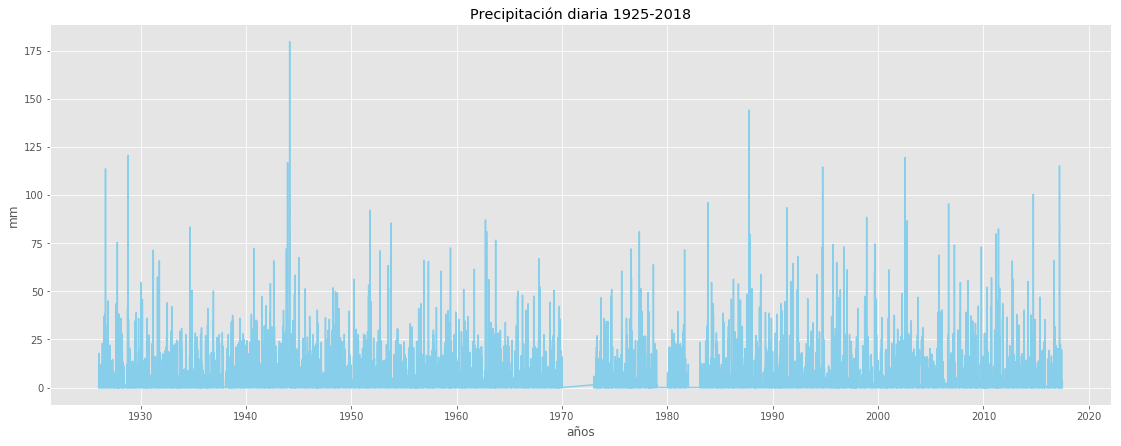

In [16]:
plt.figure(figsize=(19,7))
plt.style.use('ggplot')
plt.plot(df.DATE, df.PRCP, color='skyblue')
plt.style.use('ggplot')
plt.xlabel('años')
plt.ylabel('mm')
plt.title('Precipitación diaria 1925-2018')
plt.grid(True)
plt.show()

Quiero saber como se observa la precipitación máxima por mes y año.

In [17]:
#Insertando las columnas de mes y año:
df['mes']=df['DATE'].dt.month
df['año']=df['DATE'].dt.year

In [18]:
#Chequeando los datos nuevos:
df.dtypes

NAME            object
DATE    datetime64[ns]
PRCP           float64
TMAX           float64
TMIN           float64
mes              int64
año              int64
dtype: object

In [19]:
#Creando la lista de años que se registraron los datos:
años= df['año'].unique().tolist()
min(años)

1926

### Por mes:

In [20]:
for año in años:
    for mes in range(1,13):
        tabla = df[df['mes'].isin([mes]) & df['año'].isin([año])]
        dato= tabla[tabla['PRCP']== tabla['PRCP'].max()]
        if año == 1926 and mes == 1:
            pm = dato
        else:    
            pm =pd.concat([pm,dato],ignore_index=True)                

In [21]:
print(pm.head(15))
print(pm.dtypes)

             NAME       DATE   PRCP  TMAX  TMIN  mes   año
0   BARCELONA, SP 1926-01-14   17.8   1.8   0.1    1  1926
1   BARCELONA, SP 1926-02-06   11.7  12.4   9.8    2  1926
2   BARCELONA, SP 1926-03-24    5.3  15.3   7.8    3  1926
3   BARCELONA, SP 1926-04-12   12.1  16.8   9.5    4  1926
4   BARCELONA, SP 1926-05-14   22.8  10.3   9.4    5  1926
5   BARCELONA, SP 1926-06-05    3.9  20.5  11.7    6  1926
6   BARCELONA, SP 1926-07-06   37.0  21.0  17.6    7  1926
7   BARCELONA, SP 1926-08-31  113.6  21.0  19.6    8  1926
8   BARCELONA, SP 1926-09-28    6.1  17.6  15.6    9  1926
9   BARCELONA, SP 1926-10-21   24.9  20.5  15.6   10  1926
10  BARCELONA, SP 1926-11-18   45.0  14.9  12.1   11  1926
11  BARCELONA, SP 1926-12-27    7.9   7.2   0.7   12  1926
12  BARCELONA, SP 1927-01-02    1.0   8.7   7.3    1  1927
13  BARCELONA, SP 1927-02-10   22.0   7.4   2.3    2  1927
14  BARCELONA, SP 1927-03-28   13.8  12.8   3.6    3  1927
NAME            object
DATE    datetime64[ns]
PRCP      

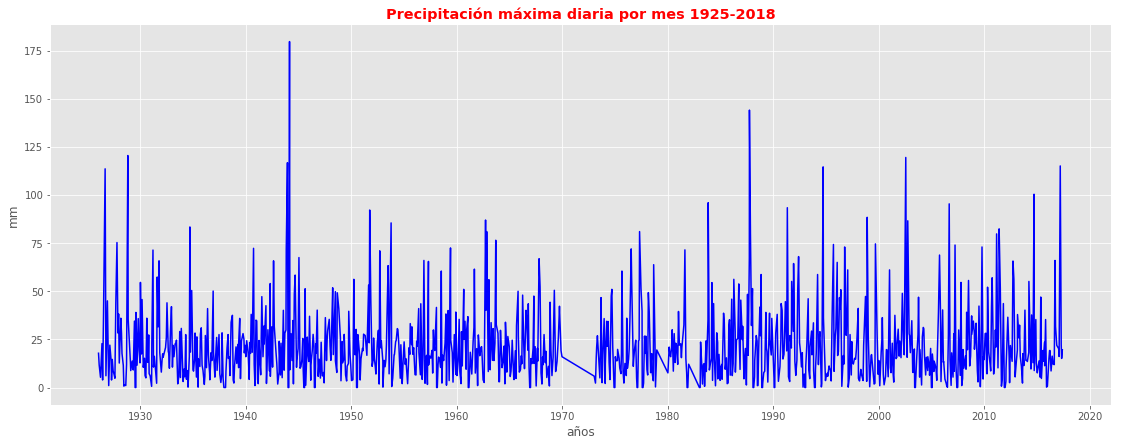

In [22]:
plt.figure(figsize=(19,7))
plt.plot(pm.DATE, pm.PRCP, color='blue')
plt.style.use('dark_background')
plt.xlabel('años')
plt.ylabel('mm')
plt.title('Precipitación máxima diaria por mes 1925-2018',color= 'red',fontweight= 'bold')
plt.grid(True)
plt.show()

### Por año:

In [23]:
for año in años:
    tabla = df[df['año']== año]
    dato= tabla[tabla['PRCP']== tabla['PRCP'].max()]
    if año == 1926:
        pa = dato
    else:    
        pa =pd.concat([pa,dato],ignore_index=True)                

In [24]:
print(pa.head(15))
print(pa.dtypes)

             NAME       DATE   PRCP  TMAX  TMIN  mes   año
0   BARCELONA, SP 1926-08-31  113.6  21.0  19.6    8  1926
1   BARCELONA, SP 1927-10-15   75.3  17.0  13.2   10  1927
2   BARCELONA, SP 1928-10-25  120.5  21.2  15.4   10  1928
3   BARCELONA, SP 1929-08-01   39.0  27.8  21.8    8  1929
4   BARCELONA, SP 1930-01-05   54.6  10.6   7.1    1  1930
5   BARCELONA, SP 1931-03-15   71.4  10.5   7.0    3  1931
6   BARCELONA, SP 1932-07-12   44.0  26.5  18.3    7  1932
7   BARCELONA, SP 1933-11-20   30.7  10.1   8.3   11  1933
8   BARCELONA, SP 1934-09-14   83.4  22.6  18.5    9  1934
9   BARCELONA, SP 1935-10-12   31.0  17.1  16.4   10  1935
10  BARCELONA, SP 1936-11-27   50.1  11.0   9.2   11  1936
11  BARCELONA, SP 1937-10-02   28.4  21.2  18.1   10  1937
12  BARCELONA, SP 1938-09-25   37.5  20.1  17.7    9  1938
13  BARCELONA, SP 1939-06-05   35.9  19.5  14.6    6  1939
14  BARCELONA, SP 1940-09-26   72.3  20.9  18.0    9  1940
NAME            object
DATE    datetime64[ns]
PRCP      

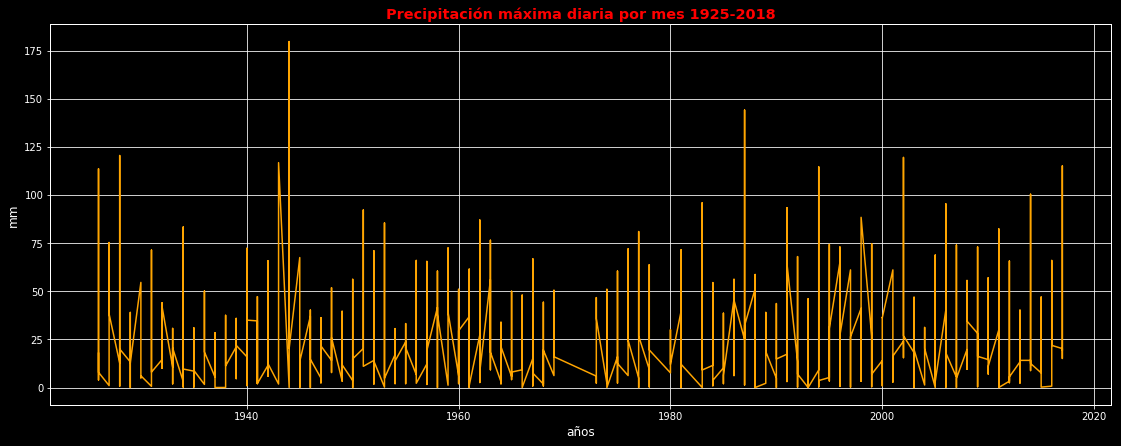

In [25]:
plt.figure(figsize=(19,7))
plt.plot(pm.año, pm.PRCP, color='orange')
plt.style.use('ggplot')
plt.xlabel('años')
plt.ylabel('mm')
plt.title('Precipitación máxima diaria por mes 1925-2018',color= 'red',fontweight= 'bold')
plt.grid(True)
plt.show()

### Graficando las temperatura máxima y mínima histórica en barcelona:

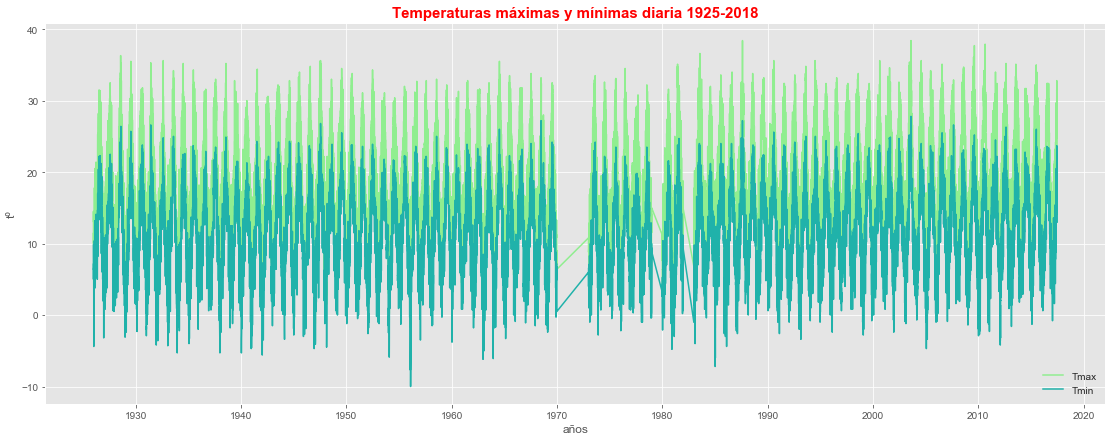

In [26]:
plt.figure(figsize=(19,7))
plt.plot(df.DATE, df.TMAX, color='lightgreen',label= 'Tmax')
plt.plot(df.DATE, df.TMIN, color='lightseagreen',label= 'Tmin')
plt.style.use('seaborn')
plt.xlabel('años')
plt.ylabel('tº')
plt.title('Temperaturas máximas y mínimas diaria 1925-2018',color= 'red',fontweight= 'bold',fontsize=15)
plt.legend(loc='lower right') 
plt.grid(True)
plt.show()